# Лабораторная работа 2
## Нелинейные алгебраические уравнения

In [1]:
import numpy as np
import math
import sympy as sp
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

### 2.1. Реализовать методы простой итерации и Ньютона решения нелинейных уравнений в виде программ, задавая в качестве входных данных точность вычислений. С использованием разработанного программного обеспечения найти положительный корень нелинейного уравнения (начальное приближение определить графически). Проанализировать зависимость погрешности вычислений от количества итераций. 

In [2]:
def d_dx(f, e = 0.0001):
    return lambda x: (f(x+e) - f(x)) / e

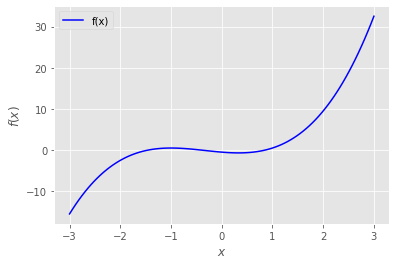

In [35]:
y = lambda x: x**3 + x**2 - x - 0.5
fig = plt.subplots()
x = np.linspace(-3, 3, 100)

plt.plot(x, y(x), label='f(x)', color='b')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left');
plt.show()

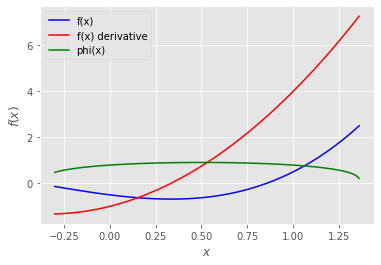

In [34]:
y = lambda x: x**3 + x**2 - x - 0.5
y1 = lambda x: 3*x**2 + 2*x - 1
y2 = lambda x: (-x**2 + x + 0.5)**(1./3.)

fig = plt.subplots()
x = np.linspace(-0.3, 1.36, 100)

plt.plot(x, y(x), label='f(x)', color='b')
plt.plot(x, y1(x), label='f(x) derivative', color='r')
plt.plot(x, y2(x), label='phi(x)', color='g')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left');
plt.show()

In [4]:
f = lambda x: x**3 + x**2 - x - 0.5
g = lambda x: (-x**2 + x + 0.5)**(1./3.)

# a = 0.5
# b = 2
# e = 0.00001

a = float(input('Введите a:'))
b = float(input('Введите b:'))
e = float(input('Введите точность:'))

Введите a:0.5
Введите b:2
Введите точность:0.00001


#### Метод простой итерации

In [5]:
def simple_iter(f, a, b, e):
    x, x_prev = (a + b) / 2, (a + b) / 2
    q = max(abs(d_dx(f)(a)), abs(d_dx(f)(b)))
    if q >= 1:
        print('Не выполнено условие сходимости')
        return
    vals = []
    while True:
        x_prev, x = x, f(x)
        vals.append(x)
        if abs(x - x_prev) * q / (1 - q) <= e:
            break
    return x, vals

Метод простой итерации
Решение уравнения: 0.8546383790426885
Количество итераций: 12
Зависимость погрешности вычислений от количества итераций:


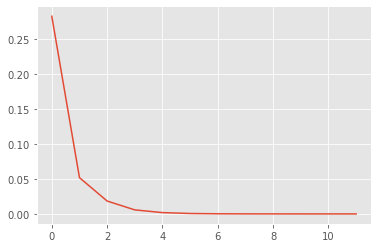

In [25]:
print('Метод простой итерации')
x, vals = simple_iter(g, a, b, e)
vals = np.abs(np.array(vals) - x)
print('Решение уравнения:', x)
print('Количество итераций:', len(vals))
print('Зависимость погрешности вычислений от количества итераций:')
plt.plot(vals);

#### Метод Ньютона

In [7]:
def newton_tangent(f, a, b, e):
    df_dx = d_dx(f)
    d2f_dx2 = d_dx(df_dx)
    der_sign1 = df_dx(np.linspace(a, b, 15)) > 0
    der_sign2 = d2f_dx2(np.linspace(a, b, 15)) > 0
    if any(der_sign1) and not all(der_sign1):
        print('Знак первой производной не постоянен')
        return
    if any(der_sign2) and not all(der_sign2):
        print('Знак второй производной не постоянен')
        return
    if f(a) > 0 and f(b) > 0 or f(a) < 0 and f(b) < 0:
        return
    x = b
    if f(x) > 0 and d2f_dx2(x) < 0 or f(x) < 0 and d2f_dx2(x) > 0:
        print('Неудачно выбрано начальное приближение')
        return
    vals = []
    while True:
        x_prev, x = x, x - f(x) / df_dx(x)
        vals.append(x)
        if abs(x - x_prev) < e:
            break
    return x, vals

Метод Ньютона
Решение уравнения: 0.8546376798151855
Количество итераций: 6
Зависимость погрешности вычислений от количества итераций:


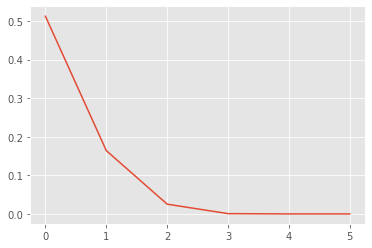

In [24]:
print('Метод Ньютона')
x, vals = newton_tangent(f, a, b, e)
vals = np.abs(np.array(vals) - x)
print('Решение уравнения:', x)
print('Количество итераций:', len(vals))
print('Зависимость погрешности вычислений от количества итераций:')
plt.plot(vals);

### 2.2. Реализовать методы простой итерации и Ньютона решения систем нелинейных уравнений в виде программного кода, задавая в качестве входных данных точность вычислений. С использованием разработанного программного обеспечения решить систему нелинейных уравнений (при наличии нескольких решений найти то из них, в котором значения неизвестных являются положительными); начальное приближение определить графически. Проанализировать зависимость погрешности вычислений от количества итераций. 

##### {x1-cos(x2)=1
##### {x2-lg(x1+1)=1

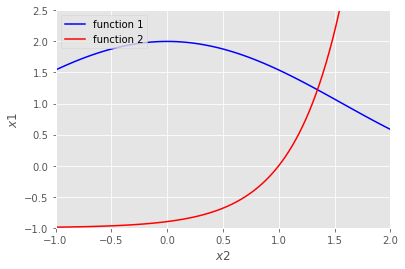

In [9]:
y = lambda x: np.cos(x) + 1
y1 = lambda x: 10**(x-1) - 1

fig = plt.subplots()
x = np.linspace(-1, 2, 100)

plt.plot(x, y(x), label='function 1', color='b')
plt.plot(x, y1(x), label='function 2', color='r')
plt.ylabel('$x1$')
plt.xlabel('$x2$')
plt.xlim([-1, 2])
plt.ylim([-1, 2.5])
plt.legend(loc='upper left');
plt.show()

In [10]:
def f1(X):
    return X[0] - math.cos(X[1]) - 1

def f2(X):
    return X[1] - math.log(X[0] + 1, 10) - 1

def df1_dx1(X):
    # df1 / dx1
    return 1

def df1_dx2(X):
    return math.sin(X[1])

def df2_dx1(X):
    return -1 / (math.log(10) * (X[0] - 1))

def df2_dx2(X):
    return 1

def phi1(X):
    # X1 = phi1(X)
    return 1 + math.cos(X[1])

def phi2(X):
    # X2 = phi2(X)
    return 1 + math.log(X[0] + 1, 10)

def dphi1_dx1(X):
    return 0

def dphi1_dx2(X):
    return -math.sin(X[1])

def dphi2_dx1(X):
    return 1 / (math.log(10) * (X[0] + 1))

def dphi2_dx2(X):
    return 0

In [11]:
def L_inf_norm(a):
    abs_a = [abs(i) for i in a]
    return max(abs_a)

In [12]:
def get_q(interval1, interval2):
    l1, r1 = interval1
    l2, r2 = interval2
    m1 = (l1 + r1) / 2
    m2 = (l2 + r2) / 2
    x1 = m1 + abs(r1 - l1)
    x2 = m2 + abs(r2 - l2)
    max1 = abs(dphi1_dx1([x1, x2])) + abs(dphi1_dx2([x1, x2]))
    max2 = abs(dphi2_dx1([x1, x2])) + abs(dphi2_dx2([x1, x2]))
    return max(max1, max2)

In [13]:
# a = 1.5 2
# b = 0 0.6
# e = 0.00001

print('Введите интервал для x1')
l1, r1 = map(float, input().split())
print('Введите интервал для x2')
l2, r2 = map(float, input().split())
eps = float(input('Введите точность: '))

Введите интервал для x1
1.5 2
Введите интервал для x2
0 0.6
Введите точность: 0.00001


##### Метод простой итерации

In [14]:
def iteration_method(phi1, phi2, intervals, eps):
    l1, r1 = intervals[0][0], intervals[0][1]
    l2, r2 = intervals[1][0], intervals[1][1]
    x_prev = [(l1 + r1) * 0.5, (l2 + r2) * 0.5]
    q = get_q(intervals[0], intervals[1])
    iters = 0
    while True:
        iters += 1
        x = [phi1(x_prev), phi2(x_prev)]
        if q / (1 - q) * L_inf_norm([(x[i] - x_prev[i]) for i in range(len(x))]) < eps:
            break
        x_prev = x

    return x, iters

In [31]:
print('Метод простой итерации')
print('Погрешность вычислений:', e)
x_iter, i_iter = iteration_method(phi1, phi2, [(l1, r1), (l2, r2)], eps)
print('x =', x_iter)
print('Значения функций в точке: f1(x) =', f1(x_iter), '; f2(x) =', f2(x_iter))
print('Количество итераций:', i_iter)

Метод простой итерации
Погрешность вычислений: 1e-05
x = [1.2221543621445135, 1.3467741664815065]
Значения функций в точке: f1(x) = 1.2988888782317076e-06 ; f2(x) = -5.74748728610075e-08
Количество итераций: 17


In [30]:
print('Метод простой итерации')
print('Погрешность вычислений:', 0.00000001)
x_iter, i_iter = iteration_method(phi1, phi2, [(l1, r1), (l2, r2)], 0.00000001)
print('x =', x_iter)
print('Значения функций в точке: f1(x) =', f1(x_iter), '; f2(x) =', f2(x_iter))
print('Количество итераций:', i_iter)

Метод простой итерации
Погрешность вычислений: 1e-08
x = [1.222153225581125, 1.346774001752315]
Значения функций в точке: f1(x) = 1.712586739088806e-09 ; f2(x) = -7.578071503644424e-11
Количество итераций: 25


##### Метод Ньютона

In [16]:
def newton_method(f1, f2, df1_dx1, df1_dx2, df2_dx1, df2_dx2, intervals, eps):
    l1, r1 = intervals[0][0], intervals[0][1]
    l2, r2 = intervals[1][0], intervals[1][1]
    x_prev = np.array([(l1 + r1) / 2, (l2 + r2) / 2])
    jacobi = []
    jacobi.append([df1_dx1(x_prev), df1_dx2(x_prev)])
    jacobi.append([df2_dx1(x_prev), df2_dx2(x_prev)])
    jacobi_inversed = np.linalg.inv(np.array(jacobi))
    iters = 0
    while True:
        iters += 1
        x = x_prev - jacobi_inversed @ np.array([f1(x_prev), f2(x_prev)])
        if L_inf_norm([(x[i] - x_prev[i]) for i in range(len(x))]) < eps:
            break
        x_prev = x

    return x, iters

In [32]:
print('Метод Ньютона')
print('Погрешность вычислений:', e)
x_newton, i_newton = newton_method(f1, f2, df1_dx1, df1_dx2, df2_dx1, df2_dx2, [(l1, r1), (l2, r2)], eps)
print('x =', x_newton)
print('Значения функций в точке: f1(x) =', f1(x_newton), '; f2(x)=', f2(x_newton))
print('Количество итераций:', i_newton)

Метод Ньютона
Погрешность вычислений: 1e-05
x = [1.22215542 1.34677666]
Значения функций в точке: f1(x) = 4.793304945627241e-06 ; f2(x)= 2.233111859650805e-06
Количество итераций: 23


In [33]:
print('Метод Ньютона')
print('Погрешность вычислений:', 0.00000001)
x_newton, i_newton = newton_method(f1, f2, df1_dx1, df1_dx2, df2_dx1, df2_dx2, [(l1, r1), (l2, r2)], 0.00000001)
print('x =', x_newton)
print('Значения функций в точке: f1(x) =', f1(x_newton), '; f2(x)=', f2(x_newton))
print('Количество итераций:', i_newton)

Метод Ньютона
Погрешность вычислений: 1e-08
x = [1.22215323 1.346774  ]
Значения функций в точке: f1(x) = 4.346436321966962e-09 ; f2(x)= 2.0249839582930917e-09
Количество итераций: 37
